<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/STP540_Single_Layer_Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Single Layer Neural Network Class

In [82]:
class SingleLayerNeuralNetwork:
    def __init__(self, input_shape=(100, 10), num_outputs=1, hidden_units=1, learning_rate=0.1, epochs=100):
        self.input_shape = input_shape
        self.num_inputs = input_shape[1]
        self.num_outputs = num_outputs
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.weights = np.random.randn(self.num_inputs, hidden_units)
        self.bias = np.random.randn(hidden_units)
        self.output_weights = np.random.randn(hidden_units, num_outputs)
        self.output_bias = np.random.randn(num_outputs)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        hidden = np.dot(inputs, self.weights) + self.bias
        hidden = self.sigmoid(hidden)
        output = np.dot(hidden, self.output_weights) + self.output_bias
        return self.sigmoid(output)
    
    def sgd(self, inputs, targets):
        for i in range(inputs.shape[0]):
            x = inputs[i]
            y = targets[i]
            
            hidden = np.dot(x, self.weights) + self.bias
            hidden = self.sigmoid(hidden)
            output = np.dot(hidden, self.output_weights) + self.output_bias
            output = self.sigmoid(output)

            error = y - output

            d_output = error * output * (1 - output)
            d_hidden = d_output.dot(self.output_weights.T) * hidden * (1 - hidden)

            d_output_weights = hidden.reshape(-1, 1).dot(d_output.reshape(1, -1))
            d_output_bias = d_output
            d_weights = x.reshape(-1, 1).dot(d_hidden.reshape(1, -1))
            d_bias = d_hidden

            self.weights += self.learning_rate * d_weights
            self.bias += self.learning_rate * d_bias
            self.output_weights += self.learning_rate * d_output_weights
            self.output_bias += self.learning_rate * d_output_bias
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            self.sgd(X, y)
    
    def get_params(self, deep=True):
        return {"input_shape": self.input_shape,
                "num_outputs": self.num_outputs,
                "hidden_units": self.hidden_units, 
                "learning_rate": self.learning_rate, 
                "epochs": self.epochs}
    
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        self.num_inputs = self.input_shape[1]
        return self

# Simulated Data

In [26]:
np.random.seed(42)
X = np.random.rand(100, 10) * 10
y = np.where(X[:, 0] > 5, 1, 0)  # use the first column of X as the label

In [27]:
X.shape

(100, 10)

## Run the Model

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def custom_score(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred.round())


# Define parameter grid
param_grid = {
    'epochs': [50, 100, 150, 300, 500],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'hidden_units': [2, 3, 4, 6, 10]
}

# Create and fit the model using Grid Search CV
model = SingleLayerNeuralNetwork(input_shape=(100,10), num_outputs=1)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=custom_score)
grid_search.fit(X, y)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)

Best hyperparameters:  {'epochs': 300, 'hidden_units': 2, 'learning_rate': 0.1}
Best accuracy:  0.9100000000000001
   Epochs Learning Rate Hidden Units  Accuracy
0     300           0.1            2      0.91
1     300           0.1            3      0.87
2     300           0.1           10      0.86
3     500           0.1            3      0.85
4     100           0.1            2      0.84
..    ...           ...          ...       ...
95    100        0.0001            2      0.43
96    300        0.0001            6      0.43
97     50         0.001            6      0.42
98     50          0.01            4      0.41
99    100          0.01           10      0.40

[100 rows x 4 columns]


# Apply the Model to Real Data

In [36]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [72]:
X = df.drop('price_range', axis=1).reset_index(drop=True)
y = df['price_range']

print(X.shape, y.shape)

(2000, 20) (2000,)


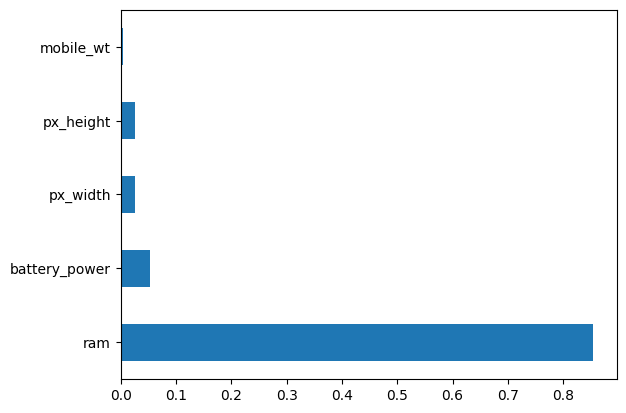

In [69]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

# plot graph of feature imoprtance for better visualization
feature_importance=pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh');

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Run the model on Real Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 150, 300, 500],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'hidden_units': [2, 3, 4, 6, 10]
}

# Create and fit the model using Grid Search CV
model = SingleLayerNeuralNetwork(input_shape=(2000,20), num_outputs=1)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=custom_score)
grid_search.fit(X_scaled, y)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)